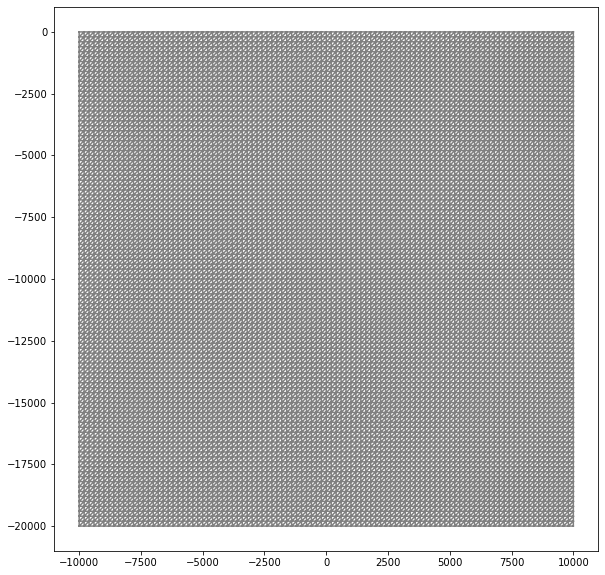

In [2]:
from fenics import *
from ufl import nabla_div
import matplotlib.pyplot as plt

# Variables
mu = 3e10
rho = 2700
width = 10e3
lambda_ = mu
g = 9.81
top = 0
tol = 1E-14 # Tolerance for boundary condition

# Calculate strain
def epsilon(u):
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)

# Calculate stress
def sigma(u):
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)

# Boundary conditions
def clamped_boundary(x, on_boundary):
    return on_boundary and (x[1] < (top - (2 * width) + 0.01))

# Create mesh and define function space
mesh = RectangleMesh(Point((-width, top - 2 * width)), Point((width, top)), 100, 100)

In [3]:
V = VectorFunctionSpace(mesh, 'P', 1)
bc = DirichletBC(V, Constant((0, 0)), clamped_boundary)

# Define variational problem
u = TrialFunction(V)
d = u.geometric_dimension()  # space dimension
v = TestFunction(V)
f = Constant((0, -rho*g))
T = Constant((0, 0))
a = inner(sigma(u), epsilon(v))*dx
L = dot(f, v)*dx + dot(T, v)*ds

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Evaluate the solution at a an arbitrary new point
u_eval = u(0, top - width)
print(u_eval)

[-1.44813747e-02 -4.81269232e+01]


In [4]:
ux = dot(u,Constant((1.0, 0.0)))
uy = dot(u,Constant((0.0, 1.0)))
umag = sqrt(ux ** 2 + uy ** 2)

/root/.julia/conda/3/lib/python3.8/site-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'colobar'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


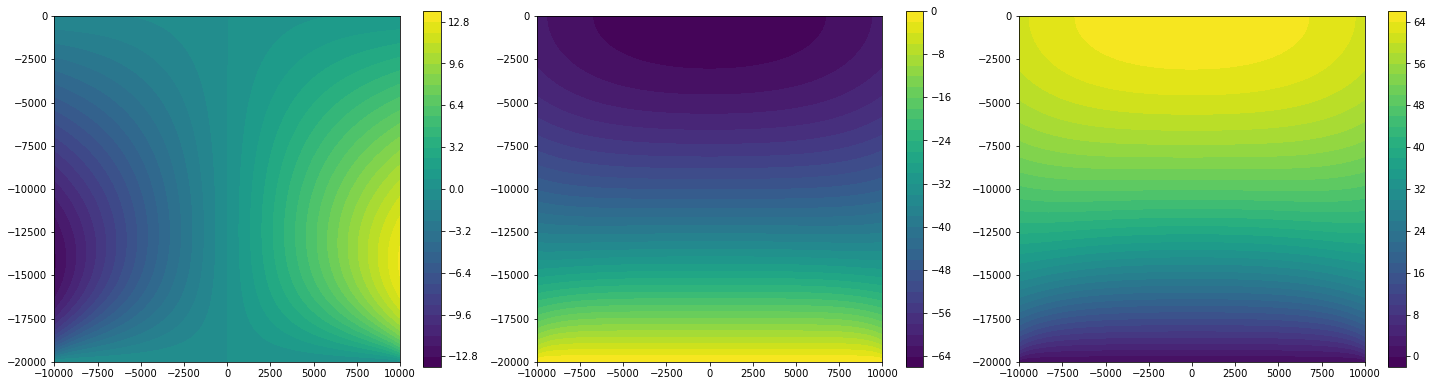

In [5]:
plt.figure(figsize=(20, 15))

plt.subplot(1,3,1)
c = plot(ux, colobar=True)
plt.colorbar(c,fraction=0.046, pad=0.06)

plt.subplot(1,3,2)
c = plot(uy, colobar=True)
plt.colorbar(c,fraction=0.046, pad=0.06)

plt.subplot(1,3,3)
c = plot(umag, colobar=True)
plt.colorbar(c,fraction=0.046, pad=0.06)
plt.tight_layout()